## I. Khám phá dữ liệu và tiền xử lý

### 1. Đọc dữ liệu, tính số dòng và số cột

Import các thư viện cần thiết

In [106]:
import numpy as np
import pandas as pd
from extractMongoDB import *
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
pd.set_option('display.max_columns', None)

Đọc dữ liệu

In [2]:
df = extract_mongodb()
# df.head()
# df = extract_by_date(start_date="2024-04-18",end_date="2024-05-02")
df.head()

,_id,id,area_used,area,bedroom,wc,juridical,date_submitted,link,address,latitude,longitude,describe,seller,seniority,phone,link_seller,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND)
0,6636c6e676dad27beb17842e,22540627.0,100.0,25.0,3.0,4.0,Sổ hồng,04/05/2024,NaN,"Nguyễn Đình Chiểu, Phường 4, Quận Phú Nhuận, ...",10.807704,106.681030,"Mô tả:,+ Vị trí ngay khu xa hoa Phan Xích Long...",Châu Minh Tuấn,880.0,908935028.0,NaN,2.50,9.5,3.0,19.0,14.0,12.0,20.0,15.0,0.0,2.0,0.0,4.0,4.60
1,6636c6e676dad27beb17842f,22524911.0,126.0,33.0,5.0,6.0,Sổ hồng,04/05/2024,NaN,"Lê Quang Định, Phường 7, Quận Bình Thạnh, TPHCM",10.807009,106.691612,"Mô tả:+DT: 3,2x9,5+ Kết cấu: 1 trệt, 1 lửng, 2...",Châu Minh Tuấn,880.0,908935028.0,NaN,3.20,9.5,5.0,13.0,15.0,9.0,11.0,12.0,0.0,4.0,4.0,11.0,4.95
2,6636c6e676dad27beb178430,22521691.0,109.0,63.0,4.0,4.0,Sổ hồng,04/05/2024,NaN,"Lê Quang Định, Phường 5, Quận Bình Thạnh, TPHCM",10.812072,106.687519,Mô tả: +DT: 4.05*12.5 nở hậu tài Lộc 7.5m; DTC...,Châu Minh Tuấn,880.0,908935028.0,NaN,4.05,12.0,2.0,17.0,9.0,7.0,8.0,3.0,0.0,2.0,1.0,8.0,6.95
3,6636c6e676dad27beb178431,22528876.0,68.0,34.1,2.0,2.0,Sổ hồng,04/05/2024,NaN,"Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7, TPHCM",10.729146,106.749084,"Bán Nhà SHR Hẻm xe ba gác ,quận 7 nguyến văn q...",Tran Chi,351.0,902759807.0,NaN,4.00,8.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.85
4,6636c6e676dad27beb178432,22534718.0,100.0,100.0,1.0,1.0,Sổ hồng,04/05/2024,NaN,"Tân Thới Hiệp 13, Phường Tân Thới Hiệp, Quận ...",10.862015,106.640930,# 057 Bán nhà Tân Thới Hiệp – Quận 12 – 100m2 ...,Dương Nhung,118.0,932608336.0,NaN,5.00,20.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.95


In [3]:
# df.drop(columns=['price(billionVND)'],inplace=True)

In [4]:
# df_prices = pd.read_csv('prices.csv')
# df_prices.head()
# df = df.merge(df_prices, on='id', how='left')

In [5]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 19211
Number of columns: 30


### 2. Mỗi dòng có ý nghĩa gì?

💬 Như đã được đề cập ở trên, dữ liệu được thu thập bằng cách crawl dữ liệu trên trang web [Mogi](https://mogi.vn/), tiền xử lý và lưu vào MongoDB Atlas. Mỗi dòng trong tập dữ liệu này tương ứng với một bản ghi các thông tin về một bất động sản ở TP.HCM được đăng bán trên trang web 'Mogi'. Bao gồm các thuộc tính như: địa chỉ, giá bán, số phòng ngủ, số phòng vệ sinh,... Do vậy, ta có thể thấy rằng các dòng thông tin có ý nghĩa khác nhau và đều truyền tải một thông tin cụ thể về một bất động sản.

### 3. Dữ liệu có bị lặp không?

In [6]:
df.duplicated().sum()

0

In [7]:
df['id'].duplicated().any()

False

In [8]:
df.shape

(19211, 30)

Như vậy không có dữ liệu bị trùng lặp

In [9]:
df.drop_duplicates(subset=['id'],inplace=True)

### 4. Kiểu dữ liệu của mỗi cột

In [10]:
df.dtypes

_id                    object
id                    float64
area_used             float64
area                  float64
bedroom               float64
wc                    float64
juridical              object
date_submitted         object
link                   object
address                object
latitude              float64
longitude             float64
describe               object
seller                 object
seniority             float64
phone                 float64
link_seller            object
witdh                 float64
length                float64
no_hospital_1km       float64
no_school_1km         float64
no_cafe_1km           float64
no_restaurant_1km     float64
no_atm_1km            float64
no_bank_1km           float64
no_supermarket_1km    float64
no_marketplace_1km    float64
no_pharmacy_1km       float64
no_fuel_1km           float64
price(billionVND)     float64
dtype: object

**💡 Nhận xét:** Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu có nhiều cột đang ở định dạng chưa phù hợp, nên cần phải tiền xử lý ở giai đoạn này.

In [11]:
df['id'] = df['id'].astype(str).str.split(".").str.get(0)
df = df[df['id']!='nan']
df['id'] = df['id'].astype(int)

In [12]:
df['date_submitted'] = pd.to_datetime(df['date_submitted'], format='%d/%m/%Y')

In [13]:
df['phone'] = df['phone'].astype('str')
df['phone'] = "0" + df['phone'].str.split(".").str.get(0)

### 5. Tỉ lệ giá trị thiếu và thống kê mô tả mỗi cột

In [14]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

_id                    0.000000
id                     0.000000
area_used              3.128416
area                   3.294987
bedroom                1.925980
wc                     1.847900
juridical              0.000000
date_submitted         0.000000
link                  56.472854
address                0.000000
latitude               1.712561
longitude              1.712561
describe               0.000000
seller                 0.000000
seniority              0.000000
phone                  0.000000
link_seller           63.245016
witdh                  3.294987
length                 3.294987
no_hospital_1km        1.077508
no_school_1km          3.841549
no_cafe_1km            0.458071
no_restaurant_1km      0.458071
no_atm_1km             1.535579
no_bank_1km            0.458071
no_supermarket_1km     0.458071
no_marketplace_1km     0.458071
no_pharmacy_1km       17.260944
no_fuel_1km            0.458071
price(billionVND)      1.004633
dtype: float64

#### 5.1. Xóa những cột không cần thiết

In [15]:
df.columns

Index(['_id', 'id', 'area_used', 'area', 'bedroom', 'wc', 'juridical',
       'date_submitted', 'link', 'address', 'latitude', 'longitude',
       'describe', 'seller', 'seniority', 'phone', 'link_seller', 'witdh',
       'length', 'no_hospital_1km', 'no_school_1km', 'no_cafe_1km',
       'no_restaurant_1km', 'no_atm_1km', 'no_bank_1km', 'no_supermarket_1km',
       'no_marketplace_1km', 'no_pharmacy_1km', 'no_fuel_1km',
       'price(billionVND)'],
      dtype='object')

In [16]:
df.drop(['_id', 'phone','link','describe','link_seller','date_submitted'],inplace=True,axis=1)

#### 5.2. Điền dữ liệu thiếu

In [17]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                     0.000000
area_used              3.128416
area                   3.294987
bedroom                1.925980
wc                     1.847900
juridical              0.000000
address                0.000000
latitude               1.712561
longitude              1.712561
seller                 0.000000
seniority              0.000000
witdh                  3.294987
length                 3.294987
no_hospital_1km        1.077508
no_school_1km          3.841549
no_cafe_1km            0.458071
no_restaurant_1km      0.458071
no_atm_1km             1.535579
no_bank_1km            0.458071
no_supermarket_1km     0.458071
no_marketplace_1km     0.458071
no_pharmacy_1km       17.260944
no_fuel_1km            0.458071
price(billionVND)      1.004633
dtype: float64

##### 5.2.1. Các cột số lượng tiện ích

Đối với các cột số lượng tiện ích, điền giá trị `NaN` bằng `0`

In [18]:
cols_to_fillna = ['no_hospital_1km','no_school_1km','no_cafe_1km','no_restaurant_1km','no_atm_1km','no_bank_1km','no_supermarket_1km','no_marketplace_1km','no_pharmacy_1km','no_fuel_1km']
df[cols_to_fillna] = df[cols_to_fillna].fillna(0)

##### 5.2.2. Cột `address`

Tách cột `address` thành 3 cột `address_district`, `address_ward`, `address_street`

In [19]:
# Remove space beginning of address
# df['address'] = df['address'].str[1:] if df['address'].str.startswith(' ') else df['address']
df['address'] = df['address'].str.lstrip()

In [20]:
df['address'].str.split(",").str.len().unique()

array([4, 3], dtype=int64)

In [21]:
df['address_district'] = df['address'].str.split(", ").str.get(-2)
df['address_ward'] = df['address'].str.split(", ").str.get(-3)
df['address_street'] = df['address'].str.split(", ").str.get(-4)

In [22]:
df[df['address'].str.split(",").str.len()==3]

,id,area_used,area,bedroom,wc,juridical,address,latitude,longitude,seller,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND),address_district,address_ward,address_street
5724,20211741,NaN,NaN,5.0,5.0,Sổ hồng,"Đường số 6A, Quận Bình Tân, TP.HCM",10.75017,106.619043,Nguyễn văn Hiếu,2490.0,NaN,NaN,1.0,9.0,3.0,9.0,5.0,5.0,0.0,3.0,1.0,11.0,8.5,Quận Bình Tân,Đường số 6A,NaN
10264,22349462,296.0,296.0,5.0,5.0,Sổ hồng,"Phường Phú Mỹ, Quận 7, TPHCM",10.72440,106.724547,NGHIÊM QUÂN,2520.0,11.0,26.7,0.0,11.0,13.0,15.0,5.0,8.0,0.0,0.0,1.0,0.0,110.0,Quận 7,Phường Phú Mỹ,NaN
10797,22342229,600.0,182.0,5.0,4.0,Sổ hồng,"Phường Phú Mỹ, Quận 7, TPHCM",10.72440,106.724547,NGHIÊM QUÂN,2520.0,7.0,26.0,0.0,11.0,13.0,15.0,5.0,8.0,0.0,0.0,1.0,0.0,85.0,Quận 7,Phường Phú Mỹ,NaN


In [23]:
df.drop(['address'],inplace=True,axis=1)

In [24]:
# Special case
df.loc[df['id']==20211741,'address_street'] = df.loc[df['id']==20211741,'address_ward']
df.loc[df['id']==20211741,'address_ward'] = "Phường Bình Trị Đông B"

In [25]:
df.loc[df['address_district'] == 'TP. Thủ Đức', 'address_district'] = 'Quận Thủ Đức (TP. Thủ Đức)'

In [26]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                    0.000000
area_used             3.128416
area                  3.294987
bedroom               1.925980
wc                    1.847900
juridical             0.000000
latitude              1.712561
longitude             1.712561
seller                0.000000
seniority             0.000000
witdh                 3.294987
length                3.294987
no_hospital_1km       0.000000
no_school_1km         0.000000
no_cafe_1km           0.000000
no_restaurant_1km     0.000000
no_atm_1km            0.000000
no_bank_1km           0.000000
no_supermarket_1km    0.000000
no_marketplace_1km    0.000000
no_pharmacy_1km       0.000000
no_fuel_1km           0.000000
price(billionVND)     1.004633
address_district      0.000000
address_ward          0.000000
address_street        0.010411
dtype: float64

Điền giá trị thiếu `address_street`

In [27]:
df["address_street"] = df["address_street"].fillna("Unknown")

##### 5.2.3. Cột `bedroom` và `wc`

In [28]:
df[['bedroom','wc']] = df[['bedroom','wc']].fillna(1)

In [29]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                    0.000000
area_used             3.128416
area                  3.294987
bedroom               0.000000
wc                    0.000000
juridical             0.000000
latitude              1.712561
longitude             1.712561
seller                0.000000
seniority             0.000000
witdh                 3.294987
length                3.294987
no_hospital_1km       0.000000
no_school_1km         0.000000
no_cafe_1km           0.000000
no_restaurant_1km     0.000000
no_atm_1km            0.000000
no_bank_1km           0.000000
no_supermarket_1km    0.000000
no_marketplace_1km    0.000000
no_pharmacy_1km       0.000000
no_fuel_1km           0.000000
price(billionVND)     1.004633
address_district      0.000000
address_ward          0.000000
address_street        0.000000
dtype: float64

##### 5.2.4. Cột `latitude` và `longtitude`

In [30]:
lat_lon_null = df[df['latitude'].isnull() & df['longitude'].isnull()]
lat_lon_null.head()

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seller,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND),address_district,address_ward,address_street
8,22463886,64.0,64.0,3.0,2.0,Sổ hồng,NaN,NaN,Nguyễn Hữu 79,425.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.50,Quận Tân Bình,Phường 11,Hồng Lạc
10,22425154,48.0,48.0,4.0,4.0,Sổ hồng,NaN,NaN,Lương Tài,880.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.39,Quận Gò Vấp,Phường 7,Nguyễn Văn Nghi
28,22481130,96.0,96.0,6.0,6.0,Sổ hồng,NaN,NaN,Nguyễn Hữu 79,425.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.00,Quận Tân Bình,Phường 14,Ba Vân
42,22379038,66.0,66.0,5.0,4.0,Sổ hồng,NaN,NaN,Lương Tài,880.0,7.7,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.68,Quận Gò Vấp,Phường 3,Nguyễn Kiệm
52,22460096,51.0,51.0,3.0,4.0,Sổ hồng,NaN,NaN,Lương Tài,880.0,4.2,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.79,Quận Gò Vấp,Phường 5,Lương Ngọc Quyến


In [31]:
def find_lat_lon(df, address_distric, address_ward, address_street):
    lat_lon_df = df[df['address_district'].str.contains(address_distric) & df['address_ward'].str.contains(address_ward) & df['address_street'].str.contains(address_street)]
    if lat_lon_df['latitude'].isnull().all():
        lat_lon_df = df[df['address_district'].str.contains(address_distric) & df['address_ward'].str.contains(address_ward)]
        if lat_lon_df['latitude'].isnull().all():
            lat_lon_df = df[df['address_district'].str.contains(address_distric)]
    lat = lat_lon_df['latitude'].mean()
    lon = lat_lon_df['longitude'].mean()
    return lat, lon

In [32]:
for index, row in lat_lon_null.iterrows():
    address_distric = row['address_district']
    address_ward = row['address_ward']
    address_street = row['address_street']

    address_distric = address_distric.replace("(","\(")
    address_distric = address_distric.replace(")","\)")
    address_ward = address_ward.replace("(","\(")
    address_ward = address_ward.replace(")","\)")
    address_street = address_street.replace("(","\(")
    address_street = address_street.replace(")","\)")
    lat, lon = find_lat_lon(df, address_distric, address_ward, address_street)
    df.loc[index,'latitude'] = lat
    df.loc[index,'longitude'] = lon

In [33]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                    0.000000
area_used             3.128416
area                  3.294987
bedroom               0.000000
wc                    0.000000
juridical             0.000000
latitude              0.000000
longitude             0.000000
seller                0.000000
seniority             0.000000
witdh                 3.294987
length                3.294987
no_hospital_1km       0.000000
no_school_1km         0.000000
no_cafe_1km           0.000000
no_restaurant_1km     0.000000
no_atm_1km            0.000000
no_bank_1km           0.000000
no_supermarket_1km    0.000000
no_marketplace_1km    0.000000
no_pharmacy_1km       0.000000
no_fuel_1km           0.000000
price(billionVND)     1.004633
address_district      0.000000
address_ward          0.000000
address_street        0.000000
dtype: float64

##### 5.2.5. Các cột liên quan đến diện tích: `area_used`, `area`, `width`, `length`

In [34]:
df.rename(columns={'witdh':'width'},inplace=True)

Thấy tỉ lệ thiếu ở cột `area` nhiều hơn `area_used`

👉 Vì vậy, đối với những giá trị `area` thiếu nhưng `area_used` có giá trị, thì điền giá trị của `area_used` cho `area`

In [35]:
df.loc[~df['area_used'].isnull() & df['area'].isnull(), 'area'] = df['area_used']

In [36]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                    0.000000
area_used             3.128416
area                  3.128416
bedroom               0.000000
wc                    0.000000
juridical             0.000000
latitude              0.000000
longitude             0.000000
seller                0.000000
seniority             0.000000
width                 3.294987
length                3.294987
no_hospital_1km       0.000000
no_school_1km         0.000000
no_cafe_1km           0.000000
no_restaurant_1km     0.000000
no_atm_1km            0.000000
no_bank_1km           0.000000
no_supermarket_1km    0.000000
no_marketplace_1km    0.000000
no_pharmacy_1km       0.000000
no_fuel_1km           0.000000
price(billionVND)     1.004633
address_district      0.000000
address_ward          0.000000
address_street        0.000000
dtype: float64

Thay thế các giá trị `area_used`, `area`, `width`, `length` còn lại bằng 1

In [37]:
df.fillna(1, inplace=True)

In [38]:
missing_ratio = df.isnull().sum()
missing_ratio = (missing_ratio / df.shape[0])*100
missing_ratio

id                    0.0
area_used             0.0
area                  0.0
bedroom               0.0
wc                    0.0
juridical             0.0
latitude              0.0
longitude             0.0
seller                0.0
seniority             0.0
width                 0.0
length                0.0
no_hospital_1km       0.0
no_school_1km         0.0
no_cafe_1km           0.0
no_restaurant_1km     0.0
no_atm_1km            0.0
no_bank_1km           0.0
no_supermarket_1km    0.0
no_marketplace_1km    0.0
no_pharmacy_1km       0.0
no_fuel_1km           0.0
price(billionVND)     0.0
address_district      0.0
address_ward          0.0
address_street        0.0
dtype: float64

### 6. Xem xét sự phân bố của các cột dữ liệu số

In [39]:
df.dtypes

id                      int32
area_used             float64
area                  float64
bedroom               float64
wc                    float64
juridical              object
latitude              float64
longitude             float64
seller                 object
seniority             float64
width                 float64
length                float64
no_hospital_1km       float64
no_school_1km         float64
no_cafe_1km           float64
no_restaurant_1km     float64
no_atm_1km            float64
no_bank_1km           float64
no_supermarket_1km    float64
no_marketplace_1km    float64
no_pharmacy_1km       float64
no_fuel_1km           float64
price(billionVND)     float64
address_district       object
address_ward           object
address_street         object
dtype: object

In [40]:
numeric_df=df.copy()
numeric_df=numeric_df[['area_used', 'area', 'bedroom', 'wc', 'latitude', 'longitude', 'no_hospital_1km', 'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km',
       'no_atm_1km', 'no_bank_1km', 'no_supermarket_1km', 'no_marketplace_1km',
       'no_pharmacy_1km', 'no_fuel_1km']]
numeric_df.describe().round(2)

,area_used,area,bedroom,wc,latitude,longitude,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km
count,19211.00,19211.00,19211.00,19211.00,19211.00,19211.00,19211.00,19211.00,19211.00,19211.00,19211.00,19211.00,19211.0,19211.00,19211.00,19211.00
mean,244.97,124.06,5.11,5.03,10.80,106.68,2.29,11.52,21.53,27.74,8.52,11.58,0.0,2.22,3.75,4.51
std,4418.88,387.14,6.71,6.78,0.04,0.05,3.06,8.55,32.68,48.79,10.64,14.99,0.0,2.49,5.83,3.24
min,1.00,1.00,1.00,1.00,10.64,106.43,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,64.00,54.00,3.00,2.00,10.77,106.64,0.00,4.00,2.00,1.00,2.00,0.00,0.0,1.00,0.00,2.00
50%,111.00,75.00,4.00,4.00,10.80,106.68,1.00,10.00,8.00,6.00,5.00,5.00,0.0,1.00,1.00,4.00
75%,225.00,120.00,5.00,5.00,10.82,106.70,4.00,18.00,25.00,39.00,11.00,19.00,0.0,3.00,6.00,7.00
max,600000.00,34444.00,100.00,100.00,11.37,106.86,18.00,38.00,250.00,382.00,74.00,93.00,0.0,17.00,39.00,15.00


### 7. Xem xét sự phân bố của các cột dữ liệu không phải dạng số

In [41]:
cate_col_df=df.select_dtypes(exclude=['float64','float32','int64','int32'])
# cate_col_df.describe().style.set_properties(**{'background-color': '#C2A3E7' ,'color':'black','border-color': '#8b8c8c'})
cate_col_df.describe()

,juridical,seller,address_district,address_ward,address_street
count,19211,19211,19211,19211,19211
unique,6,519,24,154,2028
top,Sổ hồng,Huỳnh Long,Quận Bình Thạnh,Phường 12,Huỳnh Tấn Phát
freq,17378,392,2455,943,395


In [42]:
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]

In [43]:
# df.to_csv('17-04_to_02-05.csv',index=False)

## II. Phân tích rút insight

### 1. Những người đăng tin buôn bán BĐS trên đây là những người môi giới thực thụ hay là của chính chủ đăng bán?


#### 🔎 Ý nghĩa khi trả lời được câu hỏi
+ Nếu người bán là chính chủ thì bạn có thể nhận được thông tin trực tiếp từ chính chủ của BĐS về lý do họ muốn bán, lịch sử của BĐS, và các chi tiết khác đầy đủ hơn mà không phải thông qua trung gian.
+ Ngoài ra bạn có thể đàm phán trực tiếp với chính chủ về giá cả và các điều khoản giao dịch mà không phải thông qua một bên thứ ba.
+ Tuy nhiên với người bán là môi giới BDS thì họ có thể cung cấp hỗ trợ và tư vấn trong quá trình tìm kiếm, đàm phán, và hoàn tất giao dịch, giúp bạn tiết kiệm thời gian và công sức.

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Đầu tiên ta sẽ sử dụng hàm pd.cut() để có thể phân loại dữ liệu vào các nhóm dựa trên điều kiện ban đầu mà ta đã đưa ra, ở đây điều kiện ta đưa ra là sẽ dựa theo số ngày thâm niên của người đăng tin.
- Tiếp tục ta sử dụng phương thức `values_counts` để đếm số lượng các đối tượng có cùng mức thâm niêm và gán vào biến `seniority`, với:
    - `seniority_range.index`: thâm niên
    - `seniority_range.values`: số lượng đối tượng

- Tiến hành trực quan hóa bằng barplot trong đó: trục hoành là 'Thâm niên', trục tung sẽ là 'Số lượng'. Và điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

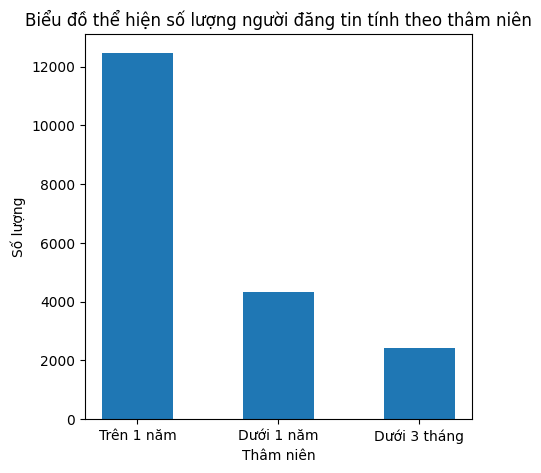

In [44]:
# Phân loại dữ liệu theo điều kiện ban đầu
seniority_range = pd.cut(df['seniority'], bins=[0,90, 365, float('inf')], labels=['Dưới 3 tháng','Dưới 1 năm', 'Trên 1 năm'])
# Tính số lượng trong từng nhóm
group_counts = seniority_range.value_counts()
# Vẽ biểu đồ
plt.subplots(figsize=(5,5))
plt.bar(group_counts.index, group_counts, width = 0.5)
plt.xlabel('Thâm niên')
plt.ylabel('Số lượng')
plt.title('Biểu đồ thể hiện số lượng người đăng tin tính theo thâm niên')
plt.show()

💡 Nhận xét:
- Phần lớn những người đăng tin buôn bán BĐS trên trang web Mogi đều là những người thuộc về đối tượng có thâm niên đăng bài là trên 1 năm.
- Tiếp đến là nhóm đối tượng có thâm niên dưới 1 năm nhưng trên 3 tháng là những người đăng tin nhiều thứ 2.
- Cuối cùng nhóm đối tượng có thâm niên dưới 3 tháng là nhóm đăng tin về BDS ít nhất.
- Nhìn chung ta có thể thấy đa số những người đăng tin buôn bán BĐS đều là những người có thâm niên trong ngành nên có thể suy đoán họ là những người môi giới BĐS.

👉 Để làm rõ hơn vấn đề ta sẽ tiếp tục đi so sánh giá đất trung bình trên / m^2 giữa 2 nhóm đối tượng là có thâm niên lớn hơn 1 năm và thâm niên ít hơn 1 năm.

In [45]:
df['area'].describe()

count    19211.000000
mean       124.058639
std        387.143361
min          1.000000
25%         54.000000
50%         75.000000
75%        120.000000
max      34444.000000
Name: area, dtype: float64

In [46]:
df.drop(df[df['area'] < 10].index, inplace=True)
df['price(billionVND)'].describe()

count    18336.000000
mean        26.731543
std        121.386607
min          0.003500
25%          5.350000
50%          8.900000
75%         22.000000
max       7600.000000
Name: price(billionVND), dtype: float64

In [47]:
df[df['price(billionVND)'] > 1000]

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seller,seniority,width,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND),address_district,address_ward,address_street
219,22480372,258.0,68.0,4.0,5.0,Sổ hồng,10.806956,106.605865,phan hoàng,730.0,4.0,17.0,0.0,4.0,3.0,2.0,3.0,2.0,0.0,0.0,0.0,3.0,6290.0,Quận Bình Tân,Phường Bình Hưng Hòa,Đường số 15
1443,22340776,120.0,40.0,3.0,3.0,Sổ hồng,10.793183,106.674568,chị Cẩm Hồng,515.0,4.0,10.0,5.0,26.0,61.0,42.0,18.0,37.0,0.0,3.0,10.0,6.0,7600.0,Quận Phú Nhuận,Phường 11,Nguyễn Đình Chính
7054,22541940,4350.0,530.0,15.0,15.0,Sổ hồng,10.787884,106.698403,Võ Hoàng Vũ,257.0,20.0,27.0,4.0,24.0,96.0,134.0,36.0,38.0,0.0,2.0,7.0,6.0,1150.0,Quận 1,Phường Đa Kao,Nguyễn Đình Chiểu
8315,22528130,508.4,508.4,15.0,15.0,Sổ đỏ,10.787884,106.698403,Nguyễn Gia Bảo,30.0,20.0,26.0,4.0,24.0,96.0,134.0,36.0,38.0,0.0,2.0,7.0,6.0,1190.0,Quận 1,Phường Đa Kao,Nguyễn Đình Chiểu
9144,22304286,90.0,45.0,4.0,3.0,Sổ hồng,10.773942,106.682941,chị Cẩm Hồng,515.0,5.0,13.0,8.0,18.0,73.0,111.0,24.0,33.0,0.0,5.0,4.0,7.0,6500.0,Quận 3,Phường 4,Nguyễn Đình Chiểu
9272,22538180,508.0,508.0,15.0,15.0,Sổ đỏ,10.787884,106.698403,HÀ SALLY,32.0,19.0,27.0,4.0,24.0,96.0,134.0,36.0,38.0,0.0,2.0,7.0,6.0,1100.0,Quận 1,Phường Đa Kao,Nguyễn Đình Chiểu
10160,22442886,3050.0,3050.0,3.0,3.0,Sổ hồng,10.780748,106.691662,mai xuân nghĩa,2400.0,35.0,90.0,8.0,27.0,123.0,179.0,54.0,45.0,0.0,1.0,3.0,7.0,2120.0,Quận 3,Phường 6 (Phường Võ Thị Sáu),Pasteur
10482,22505118,72.0,72.0,3.0,2.0,Không xác định,10.847901,106.781555,Châu Vy,116.0,4.0,16.0,3.0,10.0,3.0,7.0,8.0,8.0,0.0,1.0,2.0,4.0,4190.0,Quận 9 (TP. Thủ Đức),Phường Hiệp Phú,Trương Văn Thành
14822,22444117,3067.0,3067.0,100.0,100.0,Sổ hồng,10.780748,106.691662,Lê Thắng,665.0,35.0,90.0,8.0,27.0,123.0,179.0,54.0,45.0,0.0,1.0,0.0,7.0,2100.0,Quận 3,Phường 6 (Phường Võ Thị Sáu),Pasteur
15011,22448433,1124.0,1124.0,100.0,100.0,Sổ hồng,10.769385,106.700614,Lê Thắng,665.0,38.0,42.0,5.0,18.0,210.0,318.0,55.0,91.0,0.0,8.0,0.0,4.0,1800.0,Quận 1,Phường Nguyễn Thái Bình,Hàm Nghi


In [48]:
index_outlier = df[(df['price(billionVND)'] > 1000) & ((df['area'] < 400) | (df['area_used'] < 400))].index
index_outlier

Index([219, 1443, 9144, 10482, 18477], dtype='int64')

In [49]:
df.drop(index_outlier, inplace=True)

In [50]:
df['price_per_square_meters(mil/m2)'] = df['price(billionVND)']/df['area']*1000

In [51]:
#chuẩn bị dữ liệu và chia ra thành 2 nhóm đối tượng tương ứng
seniority_low = df.loc[(df['seniority'] < 365)]
seniority_high = df.loc[(df['seniority'] > 365)]
#tính toán các thông số giá trị đất trung bình cho từng nhóm đối tượng
mean_district_prices_1 = seniority_low.groupby('address_district')['price_per_square_meters(mil/m2)'].mean().sort_values()
mean_district_prices_2 = seniority_high.groupby('address_district')['price_per_square_meters(mil/m2)'].mean().sort_values()

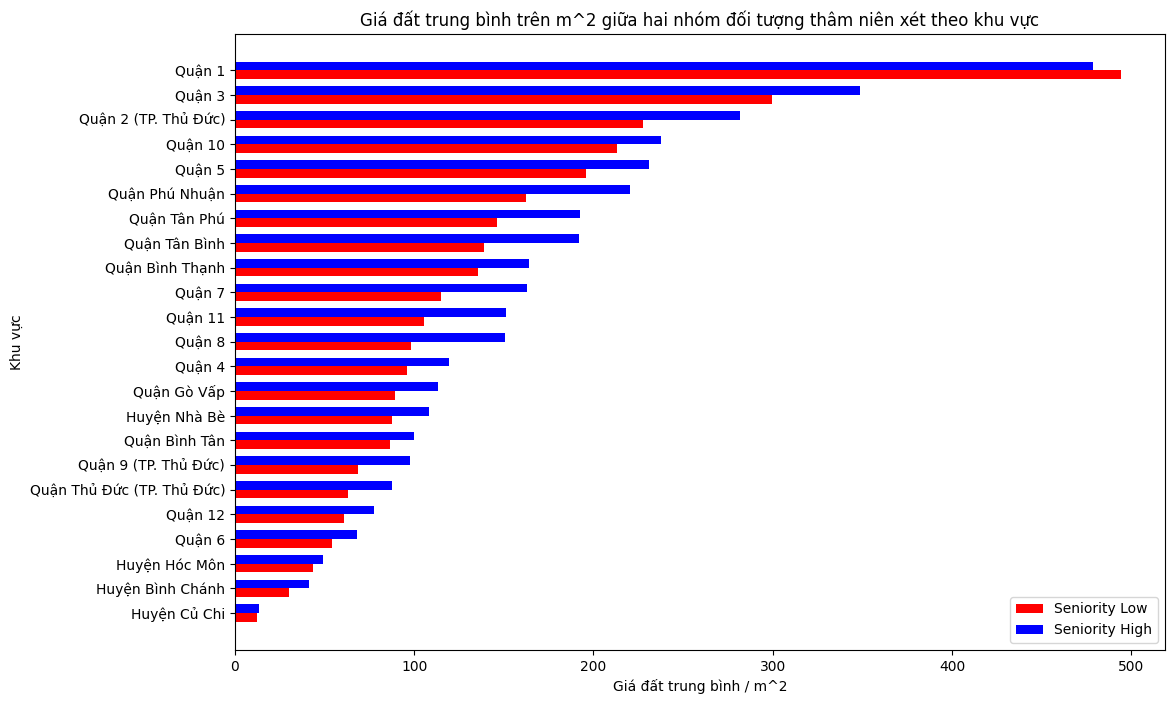

In [52]:
#Tiến hành trực quan biểu đồ
districts = mean_district_prices_1.index
positions = np.arange(len(districts))
plt.figure(figsize=(12, 8))
bar_width = 0.35
plt.barh(positions - bar_width/2, mean_district_prices_1, bar_width, color='red', label='Seniority Low')
plt.barh(positions + bar_width/2, mean_district_prices_2, bar_width, color='blue', label='Seniority High')
plt.yticks(positions, districts)
plt.xlabel('Giá đất trung bình / m^2')
plt.ylabel('Khu vực')
plt.title('Giá đất trung bình trên m^2 giữa hai nhóm đối tượng thâm niên xét theo khu vực')
plt.legend()
plt.show()

💡 Nhận xét:
- Ta có thể dễ dàng nhìn thấy giá bán BĐS của nhóm đối tượng có thâm niên lớn hơn 1 năm thì hầu như hoàn toàn đều cao hơn so với nhóm đối tượng có thâm niên ít hơn 1 năm.
- Từ đây ta có thể nhận ra rằng hầu hết các BĐS được đăng tải bởi các những nhà môi giới chuyên nghiệp thì giá trị của BĐS cũng sẽ có giá trị "nhỉnh" hơn so với mặt bằng chung. 

Lấy một ví dụ cụ thể:

In [53]:
result = df.loc[(df['id'] == 22536184) | (df['id'] ==  22365692)]
result

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seller,seniority,width,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND),address_district,address_ward,address_street,price_per_square_meters(mil/m2)
8554,22365692,67.0,67.0,3.0,3.0,Sổ hồng,10.855231,106.764523,CHI QUỲNH,695.0,5.0,13.2,1.0,16.0,17.0,8.0,17.0,9.0,0.0,1.0,7.0,3.0,1.70,Quận Thủ Đức (TP. Thủ Đức),Phường Linh Chiểu,Võ Văn Ngân,25.373134
11284,22536184,65.0,65.0,3.0,2.0,Sổ hồng,10.844421,106.766338,Nguyễn Bảo Anh,6.0,5.0,13.0,0.0,16.0,15.0,25.0,16.0,9.0,0.0,1.0,6.0,4.0,1.31,Quận Thủ Đức (TP. Thủ Đức),Phường Bình Thọ,Võ Văn Ngân,20.153846


Ta có thể thấy rằng: 
- Với diện tích tương đương nhau và cùng nằm ở khu vực Thủ Đức - đường Võ Văn Ngân, các tiện ích đi kèm cũng gần như tương đồng với nhau. Tuy nhiên với BĐS được đăng bởi người có thâm niên ít hơn lại có giá rẻ hơn so với người có thâm niên lâu hơn.

### 2. Các BĐS được rao bán có diện tích bao nhiêu là phổ biến nhất?

#### 🔎 Ý nghĩa khi trả lời được câu hỏi
+ Thông thường tùy vào nhu cầu sử dụng mà người mua sẽ lựa chọn diện tích BĐS cần mua cho phù hợp. 
+ Trả lời được câu hỏi này ta sẽ biết được diện tích phổ biến của các BĐS hiện nay là bao nhiêu và nó có phù hợp với nhu cầu của thị trường hiện nay hay không. 

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Đầu tiên ta cũng sẽ sử dụng hàm pd.cut() để có thể phân loại dữ liệu vào các nhóm dựa trên điều kiện ban đầu mà ta đã đưa ra, ở đây điều kiện ta đưa ra là sẽ dựa theo diện tích của BĐS.
- Tiếp tục ta sử dụng phương thức `values_counts` để đếm số lượng các BĐS có cùng mức diện tích và gán vào biến `area_range`, với:
    - `area_range.index`: Diện tích
    - `area_range.values`: Số lượng BĐS

- Tiến hành trực quan hóa bằng barplot trong đó: trục hoành là 'Diện tích', trục tung sẽ là 'Số lượng'. Và điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

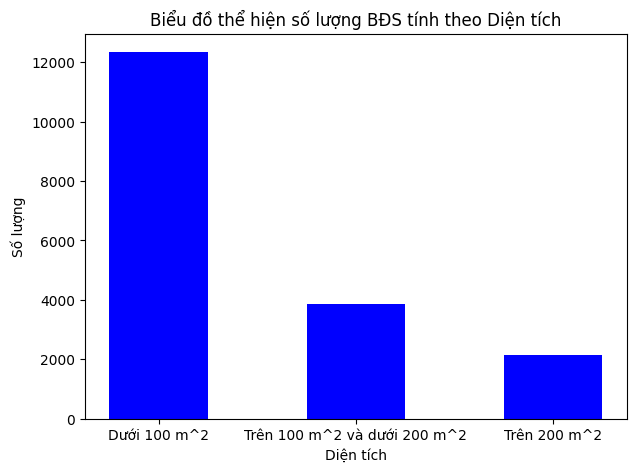

In [54]:
# Phân loại dữ liệu theo điều kiện ban đầu
area_range = pd.cut(df['area'], bins=[0,100,200 ,float('inf')], labels=['Dưới 100 m^2','Trên 100 m^2 và dưới 200 m^2', 'Trên 200 m^2'])
# Tính số lượng trong từng nhóm
group_counts = area_range.value_counts()
# Vẽ biểu đồ
plt.subplots(figsize=(7,5))
plt.bar(group_counts.index, group_counts, width = 0.5, color='blue')
plt.xlabel('Diện tích')
plt.ylabel('Số lượng')
plt.title('Biểu đồ thể hiện số lượng BĐS tính theo Diện tích')
plt.show()

💡 Nhận xét:
- Những BĐS có diện tích dưới 100 m^2 là những BDS được đăng bán nhiều nhất tại TPHCM.
- Nhóm BĐS có diện tích trên 100 m^2 và dưới 200 m^2 là những BĐS được đăng bán nhiều thứ 2.
- Cuối cùng nhóm đối tượng BĐS có diện tích lớn hơn 200 m^2 là những BĐS ít được đăng bán nhất.
- Ta có thể thấy phần lớn nhu cầu về BĐS của người dân tại TPHCM thường sẽ là những BĐS có diện tích vừa phải phù hợp để có thể xây dựng nhà phố.
- Chỉ có một phần người dân sẽ có nhu cầu mua những BĐS có diện tích lớn hơn để có xây dựng những công trình lớn như biệt thự, nhà sân vườn, ...

### 3. Tương quan giữa số lượng bedroom, wc với giá nhà

- Thực hiện linear regression giữa các giá trị số lượng bedroom và wc để xác định các giá trị outline

- Vẽ biểu đồ Correlation Matrix Heatmap giữa bedroom, wc với giá nhà

In [55]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

Sử dụng `Linear regresstion` để xác định các giá trị outliers

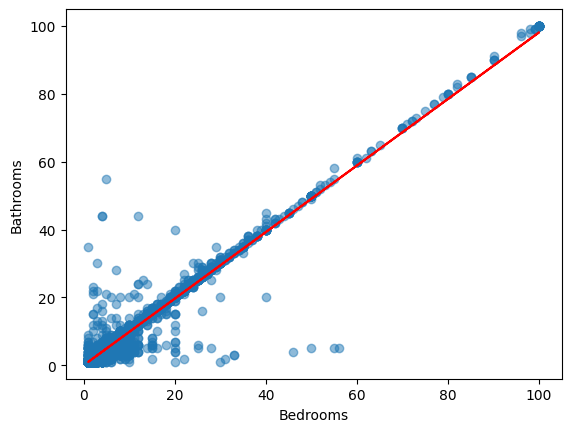

In [56]:
# Use linear regression to plot the line of best fit
model = LinearRegression()
model.fit(df[['bedroom']], df['wc'])
y = model.predict(df[['bedroom']])
plt.scatter(df['bedroom'], df['wc'], alpha=0.5)
plt.plot(df['bedroom'], y, color='red')
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

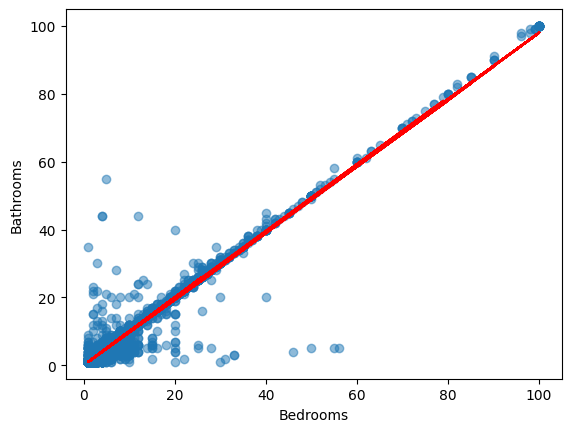

In [57]:
# round the values of the prediction to the nearest whole number
y = [round(i) for i in y]
plt.scatter(df['bedroom'], df['wc'], alpha=0.5)
plt.plot(df['bedroom'], y, color='red')
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

Loại bỏ các giá trị `outliers` bằng cách tính `absolute distance` giữa các điểm với đường thẳng linear regression và so sánh với 3 lần độ lệch chuẩn

In [58]:
df['distance'] = abs(df['wc'] - y)
df['distance'].describe()

count    18331.000000
mean         0.625007
std          1.499851
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         50.000000
Name: distance, dtype: float64

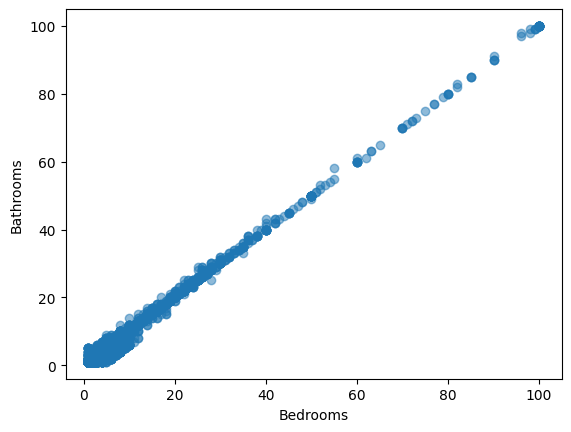

In [59]:
# Remove the outliers which have the distance from the line of best fit greater than 3 standard deviations
filtered_df = df[df['distance'] < 3 * df['distance'].std()]

plt.scatter(filtered_df['bedroom'], filtered_df['wc'], alpha=0.5)
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

In [60]:
filtered_df.shape

(18179, 28)

In [61]:
filtered_df.head()

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seller,seniority,width,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,price(billionVND),address_district,address_ward,address_street,price_per_square_meters(mil/m2),distance
0,22540627,100.0,25.0,3.0,4.0,Sổ hồng,10.807704,106.681030,Châu Minh Tuấn,880.0,2.50,9.5,3.0,19.0,14.0,12.0,20.0,15.0,0.0,2.0,0.0,4.0,4.60,Quận Phú Nhuận,Phường 4,Nguyễn Đình Chiểu,184.000000,1.0
1,22524911,126.0,33.0,5.0,6.0,Sổ hồng,10.807009,106.691612,Châu Minh Tuấn,880.0,3.20,9.5,5.0,13.0,15.0,9.0,11.0,12.0,0.0,4.0,4.0,11.0,4.95,Quận Bình Thạnh,Phường 7,Lê Quang Định,150.000000,1.0
2,22521691,109.0,63.0,4.0,4.0,Sổ hồng,10.812072,106.687519,Châu Minh Tuấn,880.0,4.05,12.0,2.0,17.0,9.0,7.0,8.0,3.0,0.0,2.0,1.0,8.0,6.95,Quận Bình Thạnh,Phường 5,Lê Quang Định,110.317460,0.0
3,22528876,68.0,34.1,2.0,2.0,Sổ hồng,10.729146,106.749084,Tran Chi,351.0,4.00,8.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.85,Quận 7,Phường Phú Thuận,Nguyễn Văn Quỳ,83.577713,0.0
4,22534718,100.0,100.0,1.0,1.0,Sổ hồng,10.862015,106.640930,Dương Nhung,118.0,5.00,20.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.95,Quận 12,Phường Tân Thới Hiệp,Tân Thới Hiệp 13,39.500000,0.0


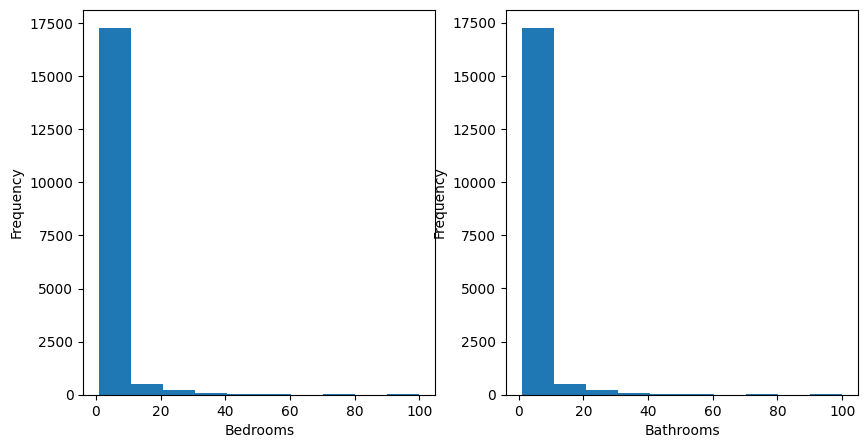

In [62]:
# Histogram of the bedrooms and bathrooms in 2 plots in the same figure
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(filtered_df['bedroom'], bins=10)
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(filtered_df['wc'], bins=10)
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.show()

Số lượng bedroom và bathroom nhỏ hơn 10 chiếm phần chủ yếu (hơn 90 %) nên có thể chọn filter các dòng có `bedroom` và `wc` nhỏ hơn 10 để phân tích

In [63]:
selected_df = filtered_df[(filtered_df['bedroom'] <= 10) & (filtered_df['wc'] <= 10)]

Tương quan giữa số lượng `bedroom` và `wc` với giá nhà

In [64]:
df_wc_bedroom_price = selected_df[['bedroom', 'wc', 'price(billionVND)']]
df_wc_bedroom_price.head()

,bedroom,wc,price(billionVND)
0,3.0,4.0,4.60
1,5.0,6.0,4.95
2,4.0,4.0,6.95
3,2.0,2.0,2.85
4,1.0,1.0,3.95


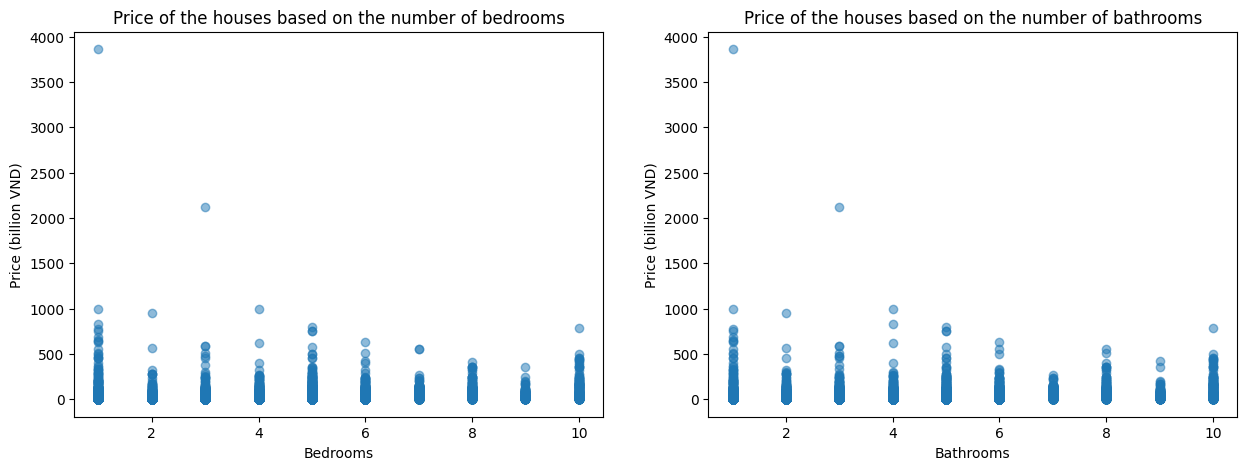

In [65]:
# Plot the price of the houses based on the number of bedrooms
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_wc_bedroom_price['bedroom'], df_wc_bedroom_price['price(billionVND)'], alpha=0.5)
plt.xlabel('Bedrooms')
plt.ylabel('Price (billion VND)')
plt.title('Price of the houses based on the number of bedrooms')
plt.subplot(1, 2, 2)
plt.scatter(df_wc_bedroom_price['wc'], df_wc_bedroom_price['price(billionVND)'], alpha=0.5)
plt.xlabel('Bathrooms')
plt.ylabel('Price (billion VND)')
plt.title('Price of the houses based on the number of bathrooms')
plt.show()

Nhìn sơ qua thì thấy được số lượng bedroom và bathroom trong 1 BDS không thực sự thể hiện rõ tác động tới giá nhà

In [66]:
df_wc_bedroom_price['price(billionVND)'].describe()

count    17238.000000
mean        22.318888
std         57.008721
min          0.003500
25%          5.190000
50%          8.500000
75%         19.800000
max       3860.000000
Name: price(billionVND), dtype: float64

Dựa vào các thông số min, 50% như trên, ràng buộc bài toán về khoảng giá nhỏ hơn 20 tỷ

Text(0, 0.5, 'Frequency')

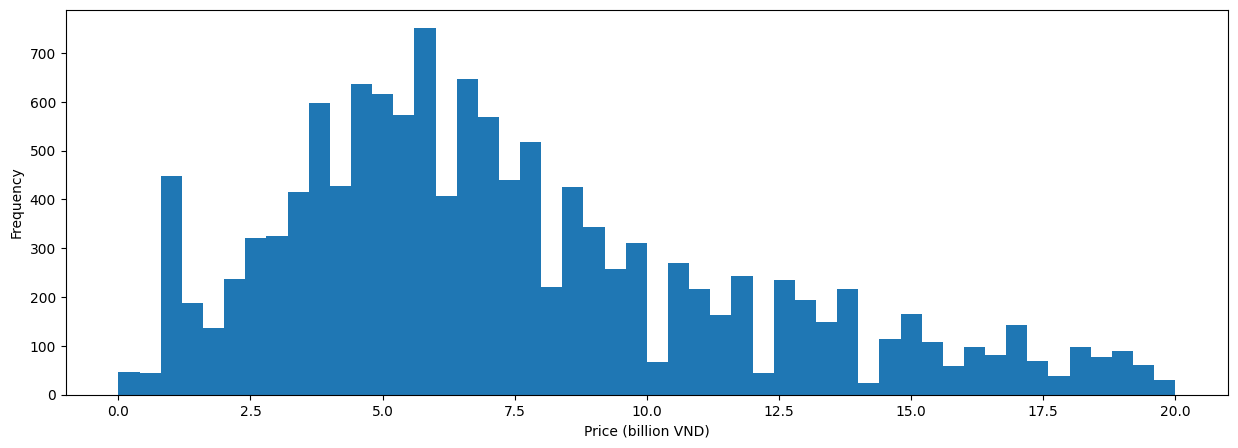

In [67]:
# Histogram of the price of the houses
plt.figure(figsize=(15, 5))
filtered_price_df = df_wc_bedroom_price[df_wc_bedroom_price['price(billionVND)'] < 20]
plt.hist(filtered_price_df['price(billionVND)'], bins=50)
plt.xlabel('Price (billion VND)')
plt.ylabel('Frequency')

Phân chia giá trị BDS như sau:

- LOW: từ 0 đến 5 tỉ
- MEDIUM: từ 5 đến 10 tỉ
- HIGH: từ 10 đến 20 tỉ

In [68]:
# Divide the price of the houses into 3 categories: low, medium, and high
filtered_price_df['price_category'] = pd.cut(filtered_price_df['price(billionVND)'], bins=[0, 5, 10, 20], labels=['low', 'medium', 'high'])
filtered_price_df.value_counts('price_category')

C:\Users\anhtu\AppData\Local\Temp\ipykernel_3096\3173950700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_price_df['price_category'] = pd.cut(filtered_price_df['price(billionVND)'], bins=[0, 5, 10, 20], labels=['low', 'medium', 'high'])


price_category
medium    5688
low       4210
high      3052
Name: count, dtype: int64

C:\Users\anhtu\AppData\Local\Temp\ipykernel_3096\1757845625.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_bedroom = filtered_price_df.groupby(['bedroom', 'price_category']).size().unstack()


<Figure size 1500x800 with 0 Axes>

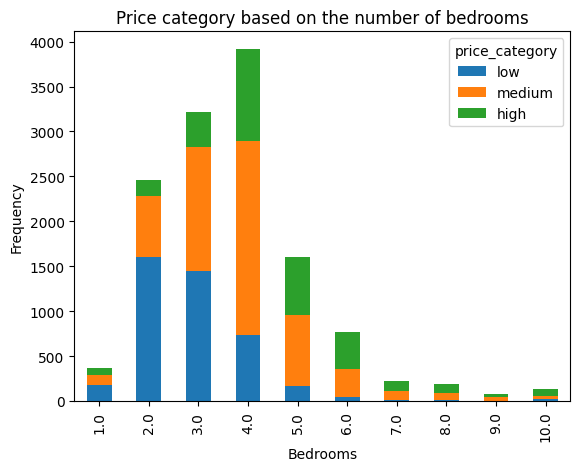

In [69]:
# Plot the stacked bar chart of the price category based on the number of bedrooms
plt.figure(figsize=(15, 8))
price_bedroom = filtered_price_df.groupby(['bedroom', 'price_category']).size().unstack()
price_bedroom.plot(kind='bar', stacked=True)
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Price category based on the number of bedrooms')
plt.show()

C:\Users\anhtu\AppData\Local\Temp\ipykernel_3096\748030838.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_bathroom = filtered_price_df.groupby(['wc', 'price_category']).size().unstack()


<Figure size 1500x800 with 0 Axes>

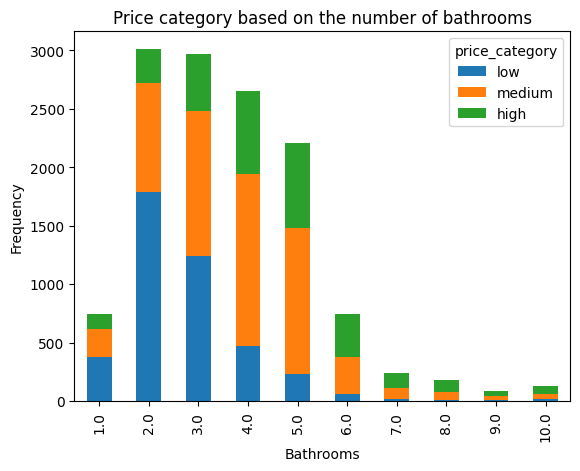

In [70]:
plt.figure(figsize=(15, 8))
price_bathroom = filtered_price_df.groupby(['wc', 'price_category']).size().unstack()
price_bathroom.plot(kind='bar', stacked=True)
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.title('Price category based on the number of bathrooms')
plt.show()

Nhận xét:

- Dựa trên biểu đồ trên t thấy được BDS có giá được xếp hạng vào `low` sẽ có số lượng `bedroom` và `bathroom` ít hơn so với các BDS xếp hạng `medium` và `high`
- Tương tự, BDS có số lượng `bedroom` và `bathroom` càng cao thì tỉ lệ giữa số lượng BDS được xếp loại `high` sẽ tăng dần

Rút ra được kết luận số lượng `bedroom` và `bathroom` có ảnh lượng tỉ lệ thuận tới phân loại giá BDS.

### 4. Tương quan giữa giá nhà và các thông số của ngôi nhà

Xử lý `juridical`

In [71]:
df['juridical'].unique()

array(['Sổ hồng', 'Hợp đồng mua bán', 'Không xác định', 'Sổ đỏ',
       'Giấy tờ hợp lệ', 'Giấy tờ viết tay'], dtype=object)

Pháp lý `Không xác định` -> 0, còn lại sẽ trả về 1

In [72]:
df.loc[df['juridical'] != 'Không xác định', 'juridical'] = 1
df.loc[df['juridical'] == 'Không xác định', 'juridical'] = 0

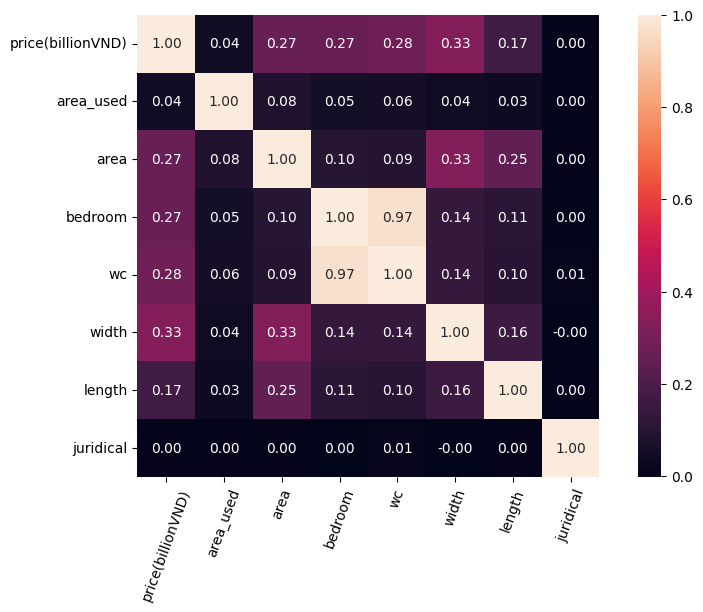

In [73]:
df_params = df[['price(billionVND)','area_used', 'area', 'bedroom', 'wc', 'width','length','juridical']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_params.corr(), annot=True, fmt=".2f", square=True)
plt.xticks(rotation=70)
plt.show()

Nhận xét:
- `bedroom` và `wc` có mối tương quan rất mạnh (0.97) -> số lượng phòng ngủ và wc thường đi đôi với nhau trong 1 ngôi nhà
- `price(billionVND)` và các biến khác: Giá nhà `price(billionVND)` có mối tương quan thấp với `area_used` (0.04) nhưng lại có mối tương quan khá mạnh với `area` cũng như là `width` và `length`. `bedroom` và `wc` cũng có mối tương quan mạnh với `price(billionVND)`. Điều đó cho thấy giá nhà phụ thuộc vào diện tích tổng thể cũng như là số phòng ngủ và wc hơn là diện tích sử dụng
- `juridical` có mối tương quan rất thấp với tất cả các biến khác, cho thấy tình hình pháp lý có thể không ảnh hưởng nhiều đến giá nhà hoặc các thông số khác của ngôi nhà.

### 5. Mối quan hệ tương quan giữa giá nhà và các tiện ích xung quanh

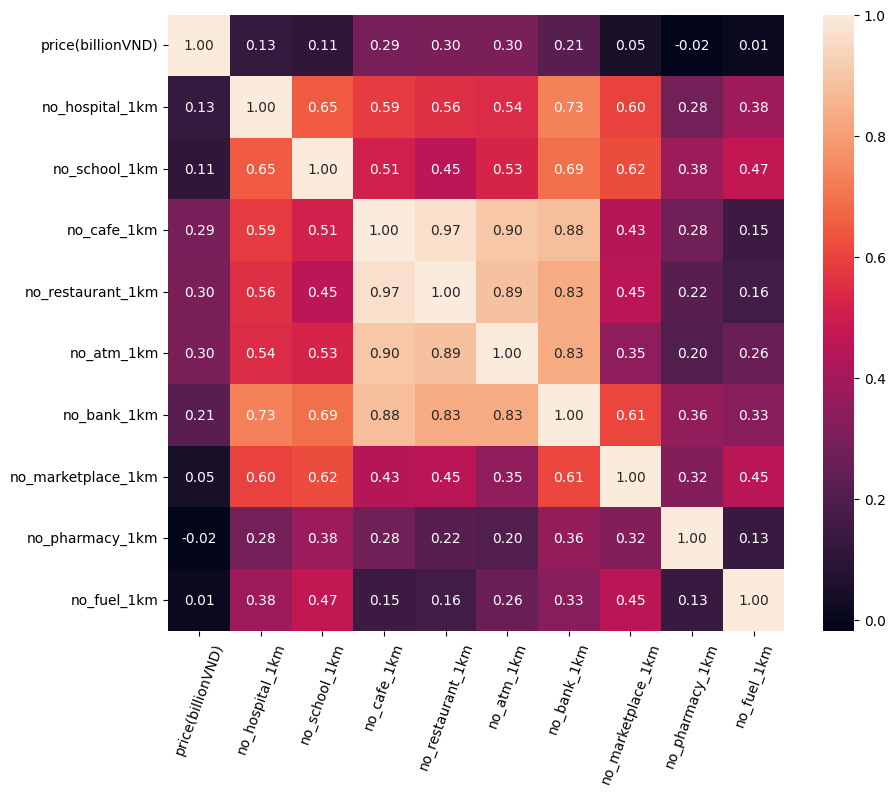

In [74]:
df_around = df[['price(billionVND)','no_hospital_1km',
       'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km', 'no_atm_1km',
       'no_bank_1km', 'no_marketplace_1km',
       'no_pharmacy_1km', 'no_fuel_1km']]

plt.figure(figsize=(10, 8))
sns.heatmap(df_around.corr(), annot=True, fmt=".2f", square=True)
plt.xticks(rotation=70)
plt.show()

Nhận xét:
- Có một mối tương quan tích cực giữa giá nhà và số lượng các tiện ích: cà phê (0.3), nhà hàng (0.31), atm(0.3), ngân hàng (0.22). Điều này cho thấy giá nhà gần các tiện ích này thường có giá cao hơn nhà gần các tiện ích khác
- Bệnh viện, trường học và giá nhà: Mối tương quan giữa giá nhà và số lượng bệnh viện (‘no_hospital_1km’: 0.126) hoặc trường học (‘no_school_1km’: 0.114) trong bán kính 1km là tương đối thấp. Điều này có thể cho thấy rằng những tiện ích này không ảnh hưởng nhiều đến giá nhà như các tiện ích khác
- Chợ, hiệu thuốc, trạm xăng và giá nhà: Mối tương quan giữa giá nhà và số lượng chợ (‘no_marketplace_1km’: 0.048), hiệu thuốc (‘no_pharmacy_1km’: -0.040), hoặc trạm xăng (‘no_fuel_1km’: 0.012) trong bán kính 1km rất thấp hoặc gần như không có. Điều này có thể cho thấy rằng những tiện ích này không ảnh hưởng đến giá nhà.
- Giữa các tiện ích với nhau:
    - Có một số mối tương quan mạnh giữa các tiện ích xung quanh, chẳng hạn như ‘no_cafe_1km’ và ‘no_restaurant_1km’ (0.970), ‘no_cafe_1km’ và ‘no_atm_1km’ (0.905), ‘no_restaurant_1km’ và ‘no_atm_1km’ (0.890). Điều này có thể cho thấy rằng các tiện ích thường được đặt gần nhau.

Kết luận: **Vì hệ số tương quan giữa giá nhà và các tiện ích rất thấp (cao nhất là 0.31) nên ngoài số lượng tiện ích còn có những yếu tố khác nữa đang ảnh hưởng đến giá nhà**

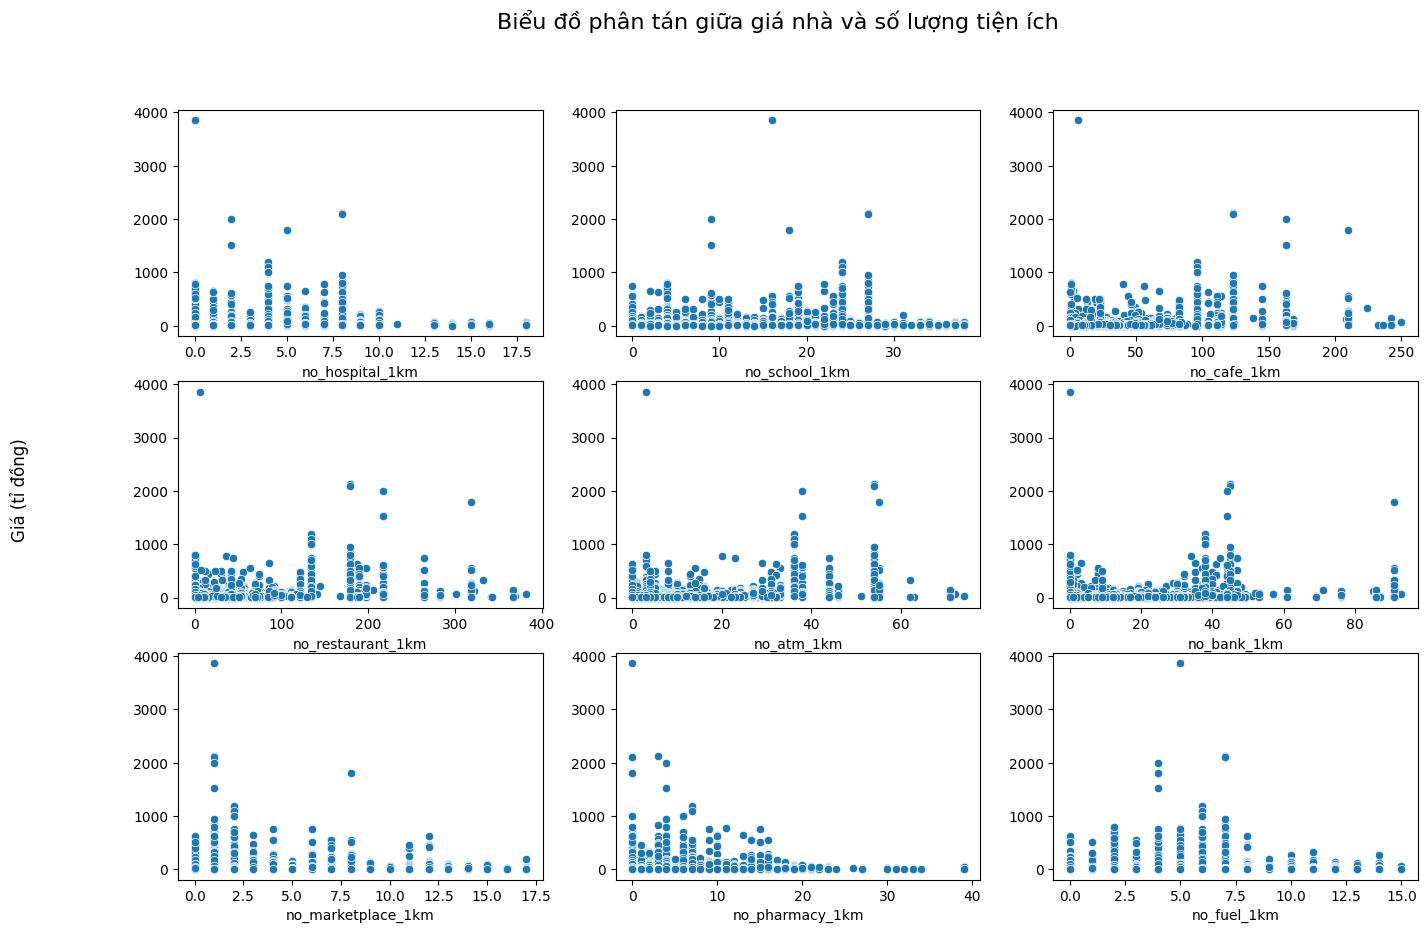

In [75]:
f, ax = plt.subplots(3,3,figsize =(16, 10))
index = 0
for row in range(3):
    for col in range(3):
        sns.scatterplot(x=df_around.columns[1:][index], y='price(billionVND)', data=df, ax=ax[row][col])
        ax[row][col].set_ylabel('')
        index += 1
f.suptitle('Biểu đồ phân tán giữa giá nhà và số lượng tiện ích', fontsize=16)
f.supylabel('Giá (tỉ đồng)')
plt.show()

Nhận xét:
- Tiện ích và giá nhà: Dựa trên biểu đồ, không có mối tương quan mạnh mẽ rõ ràng giữa giá nhà và số lượng các tiện ích như bệnh viện, trường học, cà phê, nhà hàng, ATM, ngân hàng, siêu thị, chợ, hiệu thuốc, và trạm xăng trong bán kính 1km. Điều này có thể cho thấy rằng mặc dù các tiện ích này quan trọng, nhưng chúng có thể không phải là yếu tố duy nhất ảnh hưởng đến giá nhà.
- Phân tán dữ liệu: Dữ liệu trong biểu đồ phân tán rất rộng, cho thấy có sự biến động lớn trong giá nhà cũng như số lượng các tiện ích xung quanh. Điều này có thể phản ánh sự đa dạng của các ngôi nhà và khu vực xung quanh chúng.
- Không có xu hướng rõ ràng: Không có xu hướng tăng hoặc giảm rõ ràng giữa giá nhà và số lượng các tiện ích, cho thấy có thể có các yếu tố khác ngoài số lượng tiện ích ảnh hưởng đến giá nhà.

### 6. Giá nhà giữa các khu vực

In [76]:
mean_district_prices = df.groupby('address_district')['price_per_square_meters(mil/m2)'].mean().sort_values(ascending=True)
mean_district_prices

address_district
Huyện Củ Chi                   12.578756
Huyện Cần Giờ                  33.962264
Huyện Bình Chánh               39.268262
Huyện Hóc Môn                  48.114044
Quận 12                        66.033720
Quận Thủ Đức (TP. Thủ Đức)     71.375813
Quận 9 (TP. Thủ Đức)           84.193841
Quận 8                         93.022894
Huyện Nhà Bè                   94.153338
Quận Bình Tân                 104.465861
Quận Gò Vấp                   106.443561
Quận Tân Phú                  126.425649
Quận 6                        141.083863
Quận 7                        143.561173
Quận Bình Thạnh               144.451157
Quận Tân Bình                 155.535001
Quận 4                        163.290759
Quận 11                       173.181902
Quận Phú Nhuận                180.439169
Quận 2 (TP. Thủ Đức)          223.197719
Quận 10                       230.964077
Quận 5                        253.740808
Quận 3                        335.943047
Quận 1                        481.650290

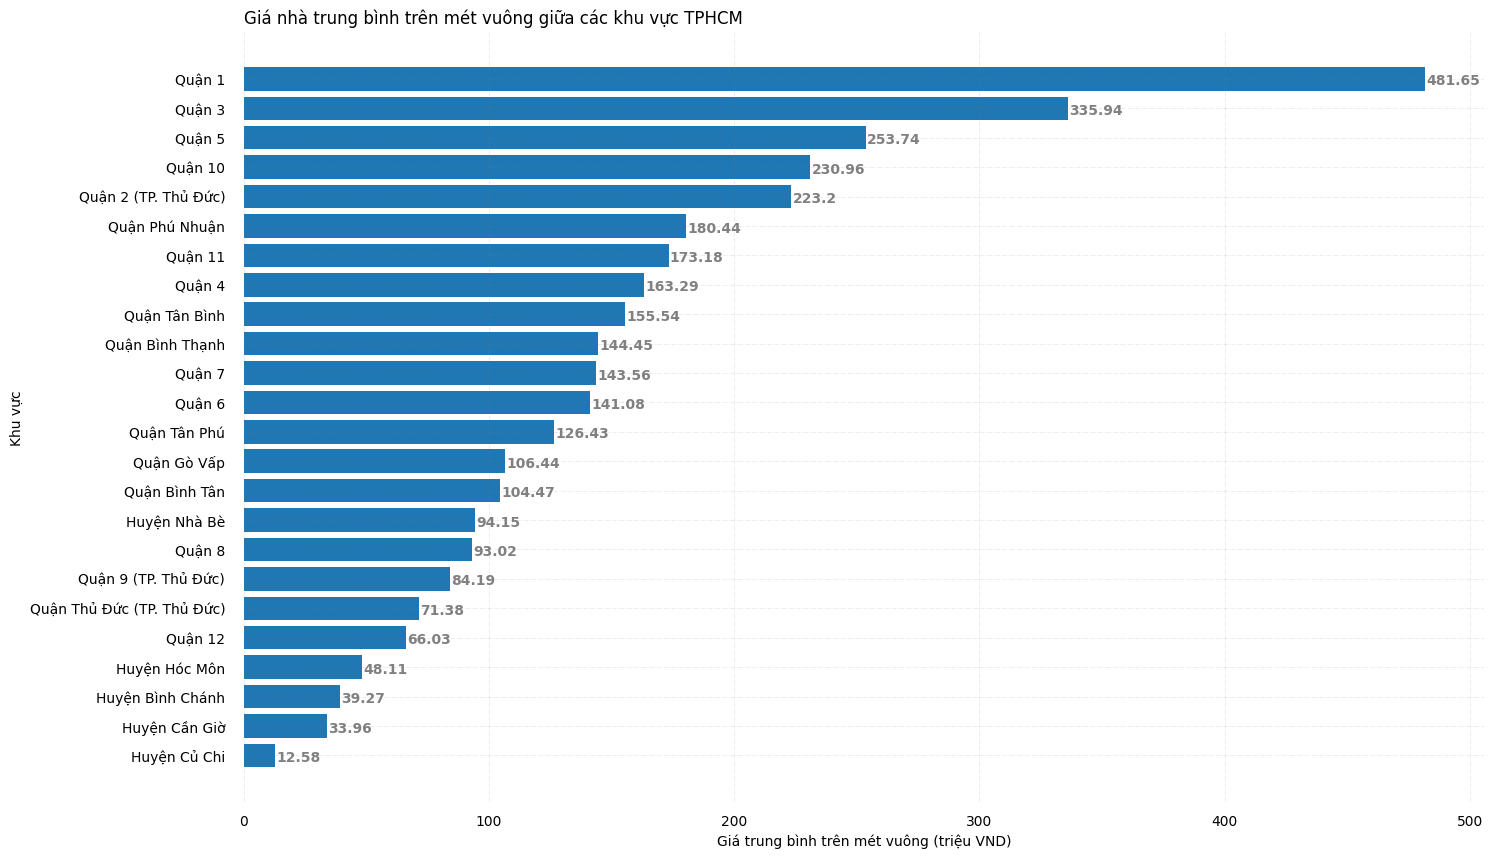

In [77]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))
 
# Horizontal Bar Plot
ax.barh(mean_district_prices.index, mean_district_prices)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values 
# ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.2, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Giá nhà trung bình trên mét vuông giữa các khu vực TPHCM', loc ='left')
ax.set_xlabel('Giá trung bình trên mét vuông (triệu VND)')
ax.set_ylabel('Khu vực')
# Show Plot
plt.show()

Nhận xét:
- Sự chênh lệch giá đất giữa các khu vực trung tâm và ngoại thành là rất lớn. Trong khi các quận 1, 3, 5 có giá trên 260 triệu đồng/m2 thì các huyện Hóc Môn, Bình Chánh, Cần Giờ, Củ Chi chỉ dưới 50 triệu đồng/m2.
- Quận 1 có mức giá đất cao nhất thành phố, đạt gần 500 triệu đồng/m2, gấp hơn 40 lần so với quận có mức giá thấp nhất là Huyện Củ Chi (chỉ 12,46 triệu đồng/m2).
- Quận 3 cũng nằm trong nhóm có giá đất cao nhất TP.HCM với ~330 triệu đồng/m2. Quận 5 đứng thứ 3 với hơn 260 triệu đồng/m2.
- Đối với TP Thủ Đức, giá nhà ở quận 2 cao hơn nhiều so với 2 quận còn lại. Lý do là vị trí địa lý quận 2 gần trung tâm thành phố, có nhiều tiện ích và dịch vụ từ nhà hàng sang trọng đến các trung tâm mua sắm. Quận 2 có nhiều dự án bất động sản cao cấp thu hút nhiều nhà đầu tư trong và ngoài nước. Ngoài ra quận 2 có vị trí thuận lợi với nhiều tuyến đường huyết mạch và dự án giao thông trọng điểm như tuyến Metro Bến Thành - Suối Tiên.
    - Thành phố Thủ Đức: Thành phố Hồ Chí Minh đã hợp nhất 3 quận (Quận 2, Quận 9 và Quận Thủ Đức) để tạo thành Thành phố Thủ Đức. Thành phố này được phát triển theo hướng thành phố công nghệ sáng tạo, thu hút các tập đoàn công nghệ đa quốc gia mở rộng sản xuất. Do đó, nhu cầu về căn hộ và nhà ở đối với người nước ngoài và chuyên gia sẽ không ngừng tăng ở Quận 2.
- Các quận trung tâm khác như quận 10, Tân Bình, Bình Thạnh vẫn đạt mức giá cao từ 140-230 triệu đồng/m2.
- Trong số các huyện, huyện Nhà Bè (96 triệu đồng/m2) có giá nhà cao hơn nhiều so với các huyện khác

Nhìn chung, biểu đồ phản ánh rõ nét sự phân hóa giá nhà đất theo vùng địa lý tại TP.HCM, với sự chênh lệch rất lớn giữa trung tâm và ngoại thành, phù hợp với mô hình phát triển kinh tế - xã hội không cân đối giữa các khu vực của thành phố.

##### ❔Tại sao lại có sự chênh lệch giá nhà giữa các quận
- Vị trí địa lý: Các quận trung tâm như Quận 1, Quận 3 thường có giá nhà cao hơn do vị trí thuận lợi, gần các khu vực kinh doanh, thương mại và dịch vụ hấp dẫn.
- Hạ tầng và tiện ích: Các quận phát triển hơn với hệ thống giao thông, hạ tầng xã hội tốt hơn sẽ có giá nhà cao hơn các quận vùng ven.
- Cung cầu nhà đất: Tại các quận trung tâm, nguồn cung nhà đất hạn chế trong khi nhu cầu cao sẽ đẩy giá nhà lên cao.
- Môi trường sống: Các quận có môi trường sống đô thị, an ninh tốt hơn thường được ưa chuộng hơn, từ đó làm tăng giá nhà.

In [79]:
# pd.read_excel("acreage_district2023.xlsx")

In [80]:
# # Thống kê mật độ  tiện ích xung quanh giữa các quận
# df_sum_around = df.groupby('address_district', as_index=False)[['no_hospital_1km', 'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km',
#                                                                 'no_atm_1km', 'no_bank_1km', 'no_supermarket_1km', 'no_marketplace_1km', 'no_pharmacy_1km', 'no_fuel_1km']].mean()
# df_sum_around

In [81]:
# # Figure Size
# fig, ax = plt.subplots(figsize =(16, 10))
 
# hos_df = df_sum_around[['address_district', 'no_hospital_1km']].sort_values(by='no_hospital_1km', ascending=True)
# # Horizontal Bar Plot
# ax.barh(hos_df['address_district'], hos_df['no_hospital_1km'].sort_values(ascending=True))
 
# # Remove axes splines
# for s in ['top', 'bottom', 'left', 'right']:
#     ax.spines[s].set_visible(False)
 
# # Remove x, y Ticks
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')
 
# # Add padding between axes and labels
# ax.xaxis.set_tick_params(pad = 5)
# ax.yaxis.set_tick_params(pad = 10)
 
# # Add x, y gridlines
# ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# # Show top values 
# # ax.invert_yaxis()

# # Add annotation to bars
# for i in ax.patches:
#     plt.text(i.get_width()+0.5, i.get_y()+0.2, 
#              str(round((i.get_width()), 2)),
#              fontsize = 10, fontweight ='bold',
#              color ='grey')
 
# # Add Plot Title
# ax.set_title('Mật độ bệnh viện', loc ='left')
# ax.set_xlabel('Giá trung bình trên mét vuông (triệu VND)')
# ax.set_ylabel('Khu vực')
# # Show Plot
# plt.show()

**Kết luận:** Giá nhà bị ảnh hưởng nhiều bởi vị trí địa lý, diện tích, các tiện ích xung quanh: các bất động sản gần các địa điểm giải trí: cafe, nhà hàng sẽ có giá cao hơn các bất động sản gần các địa điểm còn lại